In [1]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `image` mode scenario of `Plot` class.

In [2]:
# Necessary imports
import sys
import numpy as np
from skimage.io import imread

sys.path.insert(0, '../..')
from glyf import plot

In [3]:
# Load sample image
image = imread('./data/image.png')

To plot an image, simply pass an array to class init.

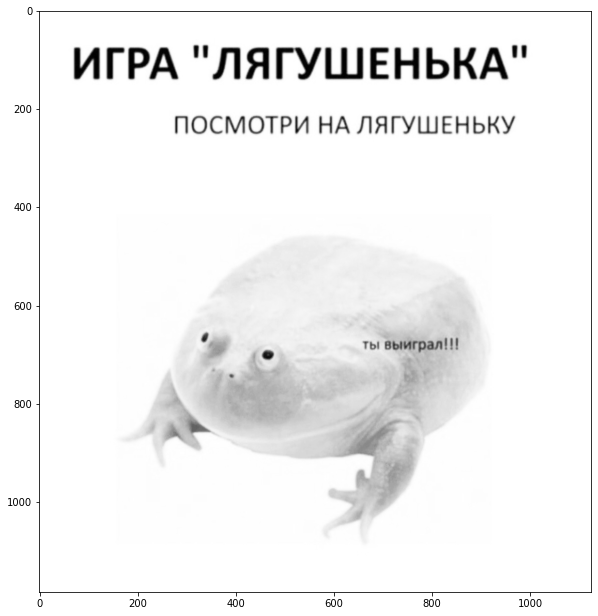

In [4]:
plot(image)

To change colormap use `cmap` parameter.

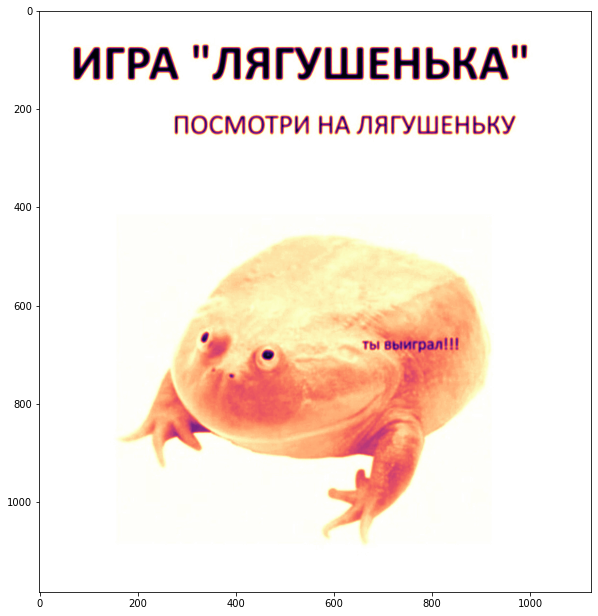

In [5]:
plot(
    data=image,
    cmap='batchflow' # new parameter
)

Only a few parameters are parsed from keyword arguments (aka kwargs) and forwarded to `plt.imshow` — `cmap`, `alpha`, `vmin`, `vmax`, `extent`.

But surely, `matplotlib.pyplot.imshow` accepts many parameters besides those. To provide them, use `image_` prefix in parameter name.

Doing so you'll explicitly declare that this parameter is meant for image display and that it should be parsed and passed to `plt.imshow`, like `aspect` in example below.

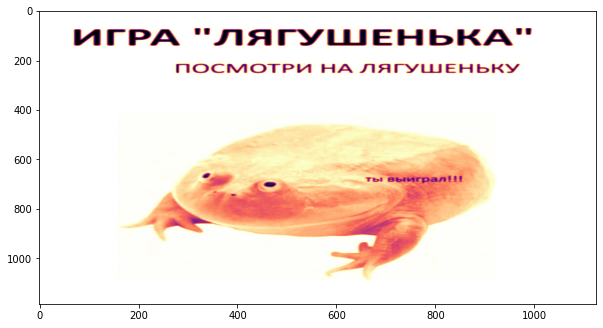

In [6]:
plot(
    data=image,
    cmap='batchflow',
    image_aspect=0.5 # new parameter
)

To add colorbar and title provide `colorbar` and `title` keyword parameters.

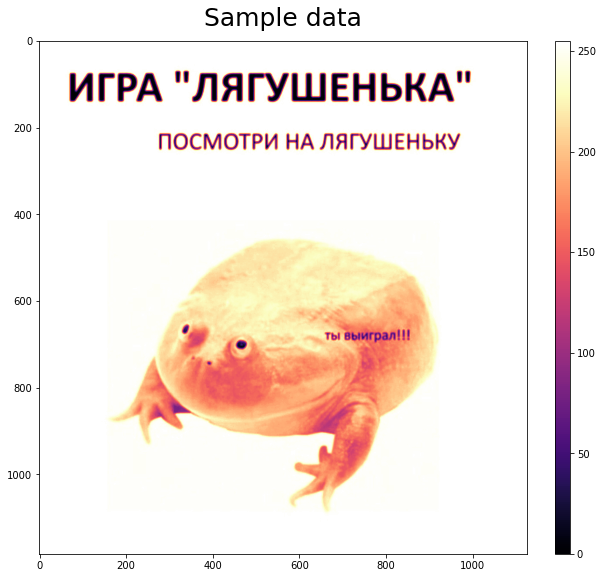

In [7]:
plot(
    data=image,
    cmap='batchflow',
    colorbar=True, # new parameter
    title='Sample data' # new parameter
)

One might customize annotations, providing `'size'`, `'family'`, `'rotation'` and other parameters valid for `matplotlib.pyplot.text`.

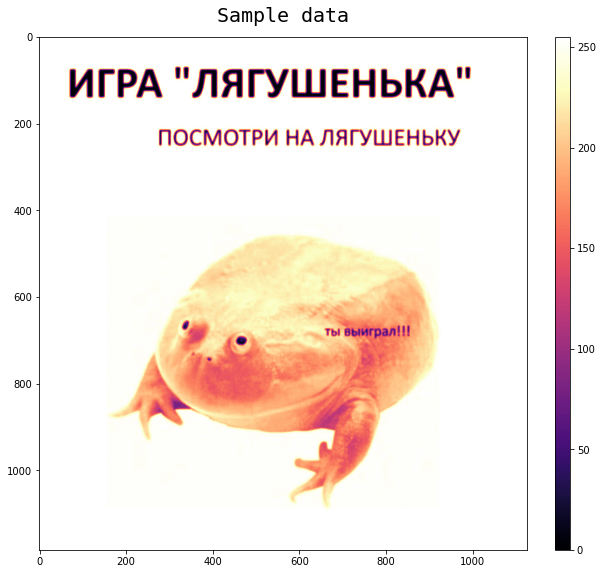

In [8]:
plot(
    data=image,
    cmap='batchflow',
    colorbar=True,
    title='Sample data',
    title_size=20, # new parameter
    title_family='monospace' # new parameter
)

Now let's load binary mask corresponding image above and display it.

In [9]:
# Load object mask
object_mask = imread('data/object_mask.png') / 255

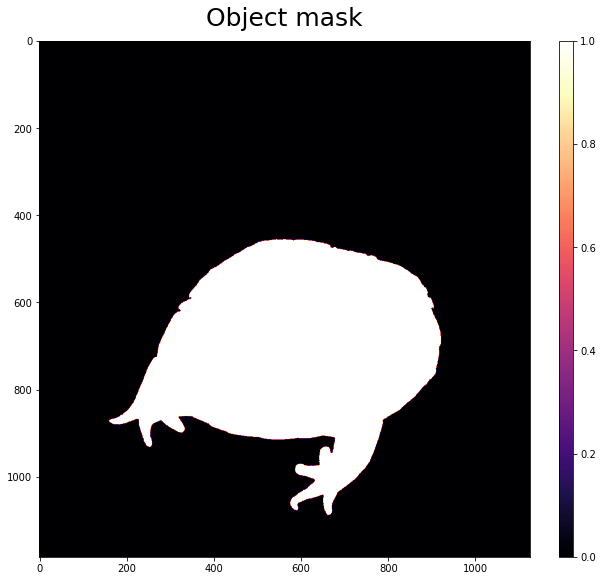

In [10]:
plot(
    data=object_mask, # parameter changed
    cmap='batchflow',
    colorbar=True,
    title='Object mask', # parameter changed
)

To overlay mask over image provide them in a list.

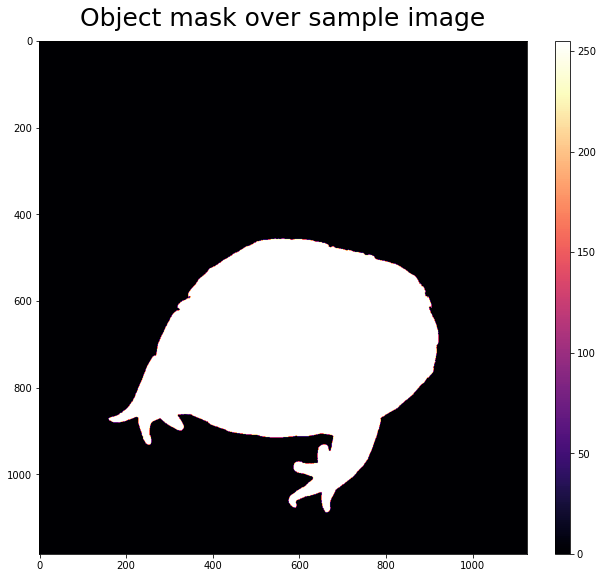

In [11]:
plot(
    data=[image, object_mask], # parameter changed
    cmap='batchflow',
    colorbar=True,
    title='Object mask over sample image', # parameter changed
)

As one might notice, the mask has fully covered the image, effectively making it invisible.

To make 0s transparent in binary mask and color 1s with automatically chosen color, use `augment_mask` flag.

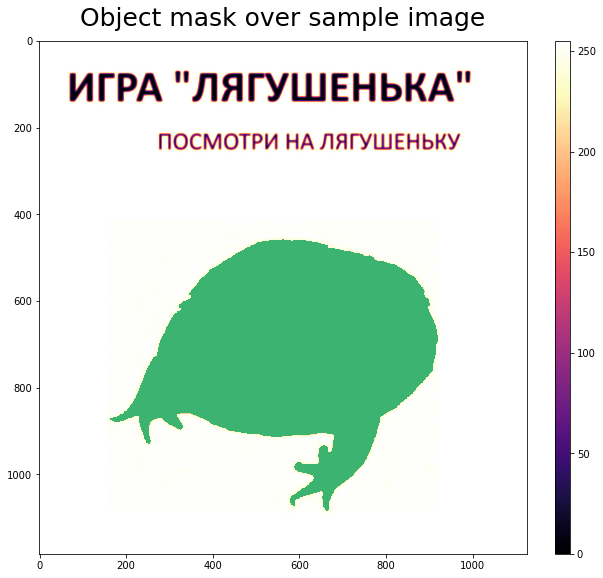

In [12]:
plot(
    data=[image, object_mask],
    cmap='batchflow',
    colorbar=True,
    title='Object mask over sample image',
    augment_mask=True # new parameter
)

If one wishes to make layer transparent, there is an `'alpha'` parameter meant just for that.

To make second layer transparent, but keep the first one opaque, provide `alpha` value as list of values for every layers.

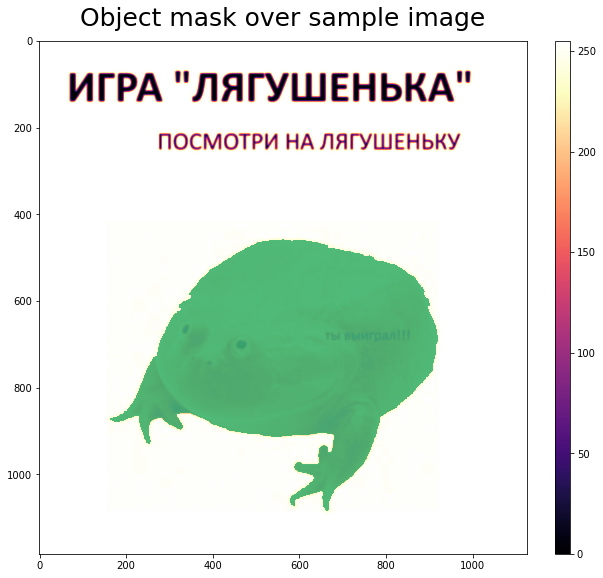

In [13]:
plot(
    data=[image, object_mask],
    cmap='batchflow',
    colorbar=True,
    title='Object mask over sample image',
    augment_mask=True,
    alpha=[1.0, 0.9] # new parameter
)

Let's load text mask and also plot it.

In [14]:
text_mask = imread('data/text_mask.png') / 255

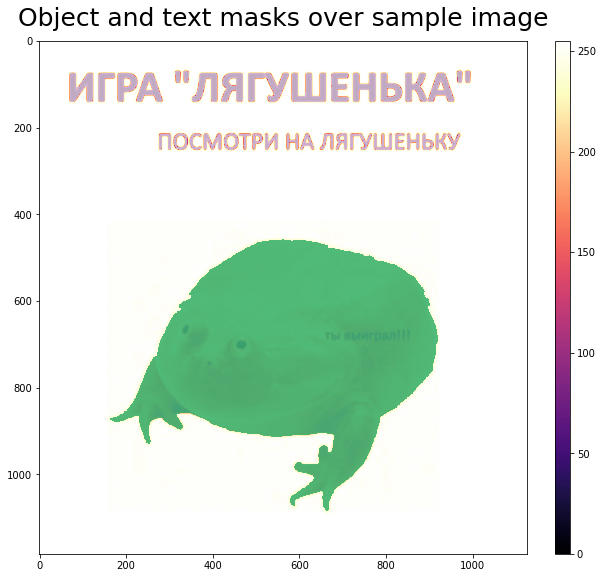

In [15]:
plot(
    data=[image, object_mask, text_mask], # parameter changed
    cmap='batchflow',
    colorbar=True,
    title='Object and text masks over sample image', # parameter changed
    augment_mask=True,
    alpha=[1.0, 0.9, 0.9] # parameter changed
)

Note that valid matplotlib colors act as single-color cmaps, which is useful for binary mask display.

Keep in mind, however, that if a color is provided under `cmap` parameter and `augment_mask` is not enabled, the whole layer will be displayed with a single color.

To add legend provide `label` argument. Colors are taken from `cmap` argument.

To modify legend size, location or other parameters, provide corresponding parameters with `'legend_'` prefix.

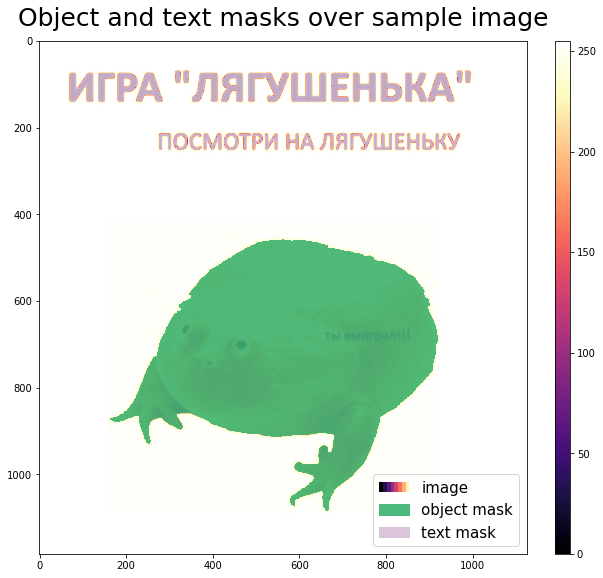

In [16]:
plot(
    data=[image, object_mask, text_mask],
    cmap='batchflow',
    colorbar=True,
    title='Object and text masks over sample image',
    augment_mask=True,
    alpha=[1.0, 0.9, 0.9],
    label=['image', 'object mask', 'text mask'], # new parameter
    legend_loc=4 # new parameter
)

To skip specific legend label, use `False` value.

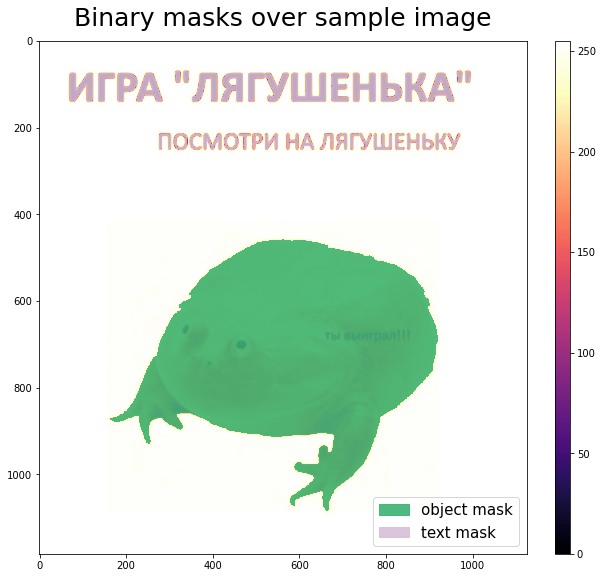

In [17]:
plot(
    data=[image, object_mask, text_mask],
    cmap='batchflow',
    colorbar=True,
    title='Binary masks over sample image',
    augment_mask=True,
    alpha=[1.0, 0.9, 0.9],
    label=[None, 'object mask', 'text mask'], # parameter changed
    legend_loc=4
)

To display given images separately, use `combine='separate'`.

To make different titles for every subplot, provide them in a list of length same as data list.

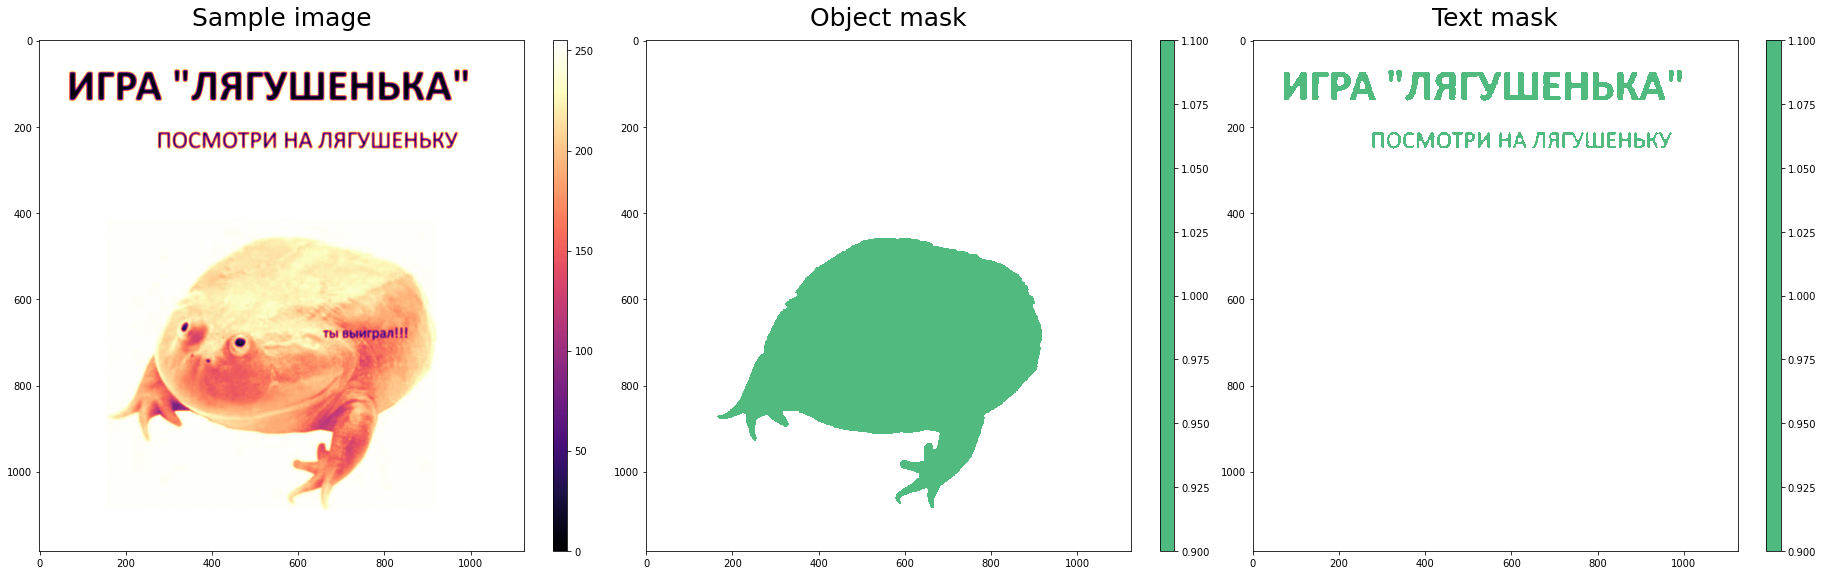

In [18]:
plot(
    data=[image, object_mask, text_mask],
    cmap='batchflow',
    colorbar=True,
    title=['Sample image', 'Object mask', 'Text mask'],
    augment_mask=True,
    alpha=[1.0, 0.9, 0.9],
    combine='separate' # new parameter
)

Colorbar can be disabled for chosen images.

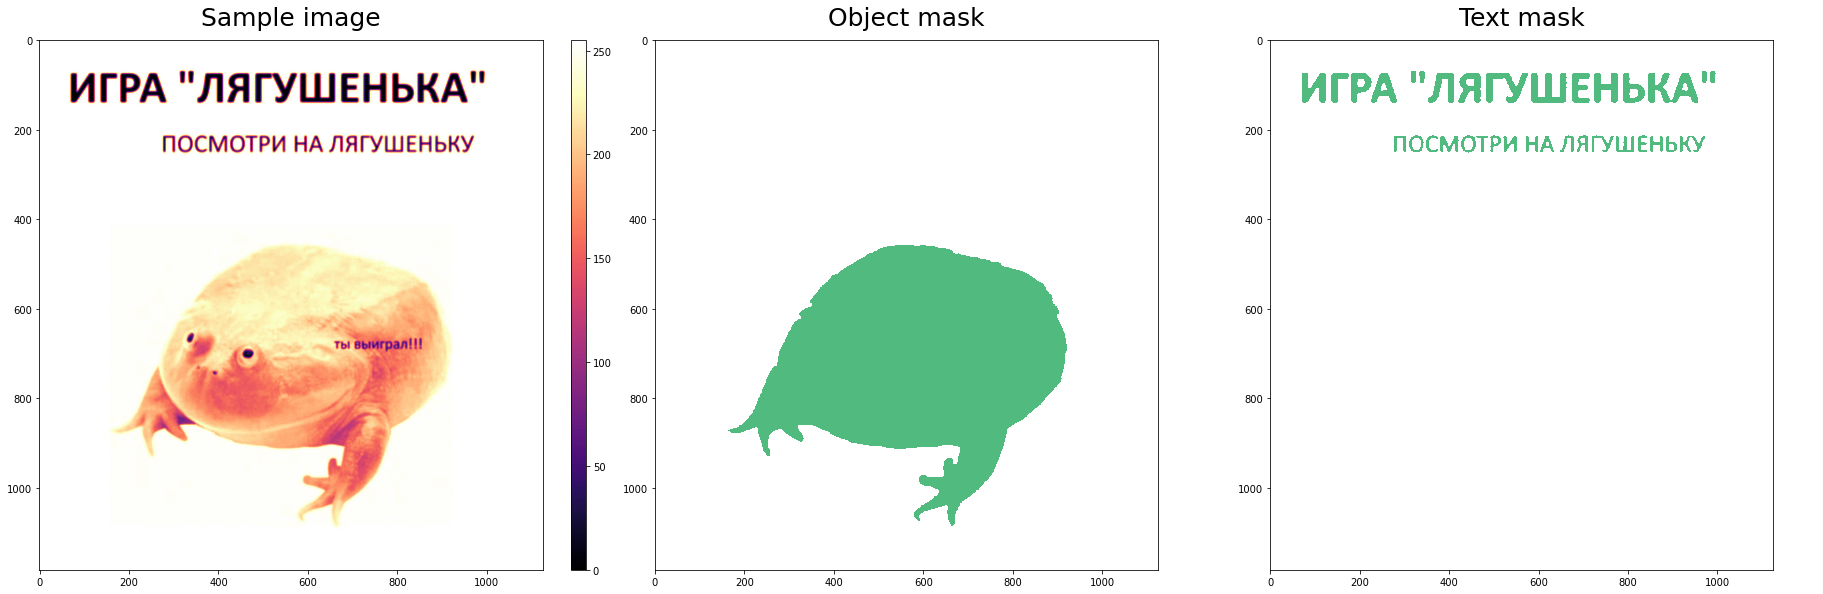

In [19]:
plot(
    data=[image, object_mask, text_mask],
    cmap='batchflow',
    colorbar=[True, False, False], # parameter changed
    title=['Sample image', 'Object mask', 'Text mask'],
    augment_mask=True,
    alpha=[1.0, 0.9, 0.9],
    combine='separate'
)

To display images in ``'mixed'`` manner, i.e. with some image overlaid and some displayed separately, use nested lists of image arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

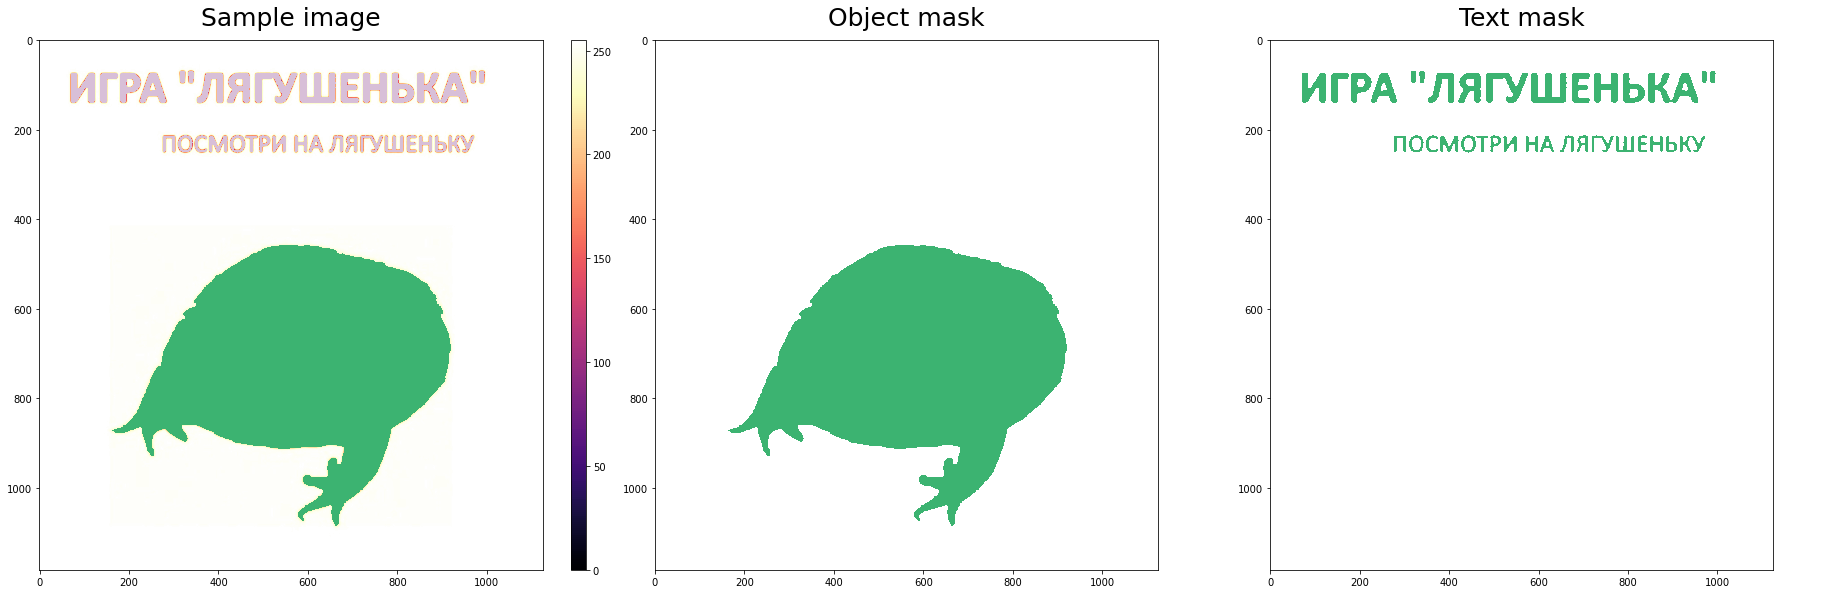

In [20]:
plot(
    data=[[image, object_mask, text_mask], object_mask, text_mask], # parameter changed
    cmap='batchflow',
    colorbar=[True, False, False], # parameter changed
    title=['Sample image', 'Object mask', 'Text mask'],
    augment_mask=True,
)

Use `None` in data list to keep specific subplot empty. One can access and modify it later, using subplot indexing.

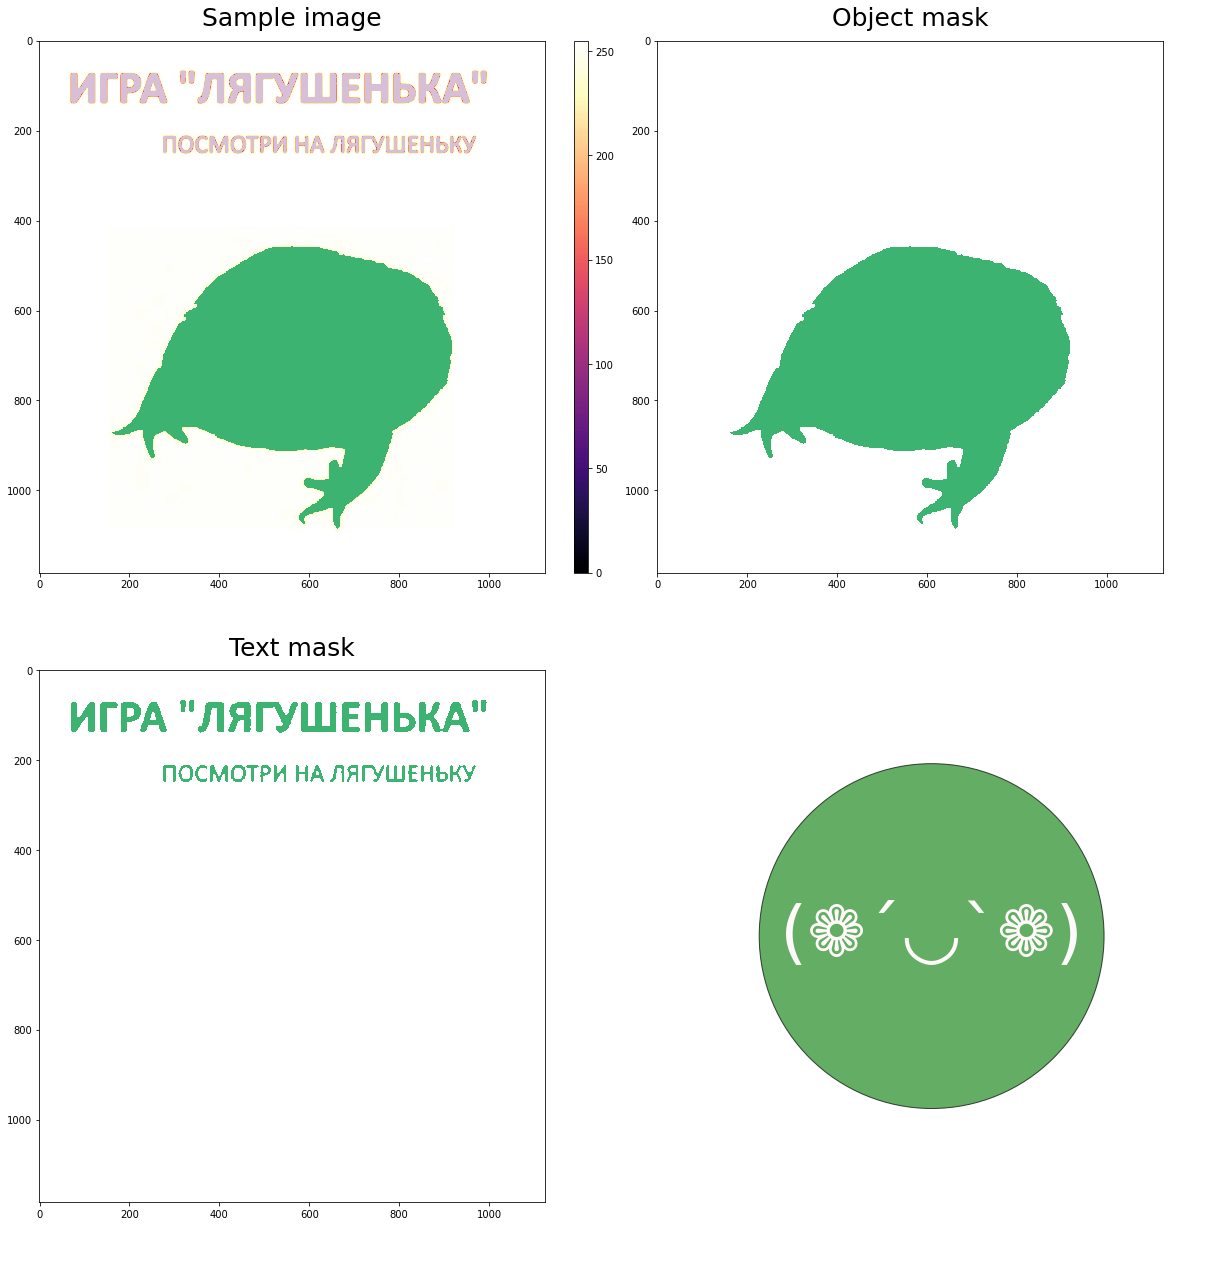

In [21]:
plotter = plot(
    data=[[image, object_mask, text_mask], object_mask, text_mask, None], # parameter changed
    cmap='batchflow',
    colorbar=[True, False, False], # parameter changed
    title=['Sample image', 'Object mask', 'Text mask'],
    augment_mask=True,
    ncols=2,
    nrows=2
)

plotter[-1].add_text(
    text='(❁´◡`❁)',
    size=70,
    color='snow',
    bbox={
        'boxstyle': 'circle',
        'facecolor': 'forestgreen',
        'alpha': 0.7
    }
)

plotter

If you have a bunch of different-shaped images, the `plot` will manage optimal figsize itself.

And while `figsize` parameter is still available, one might find using `scale` option more convenient.

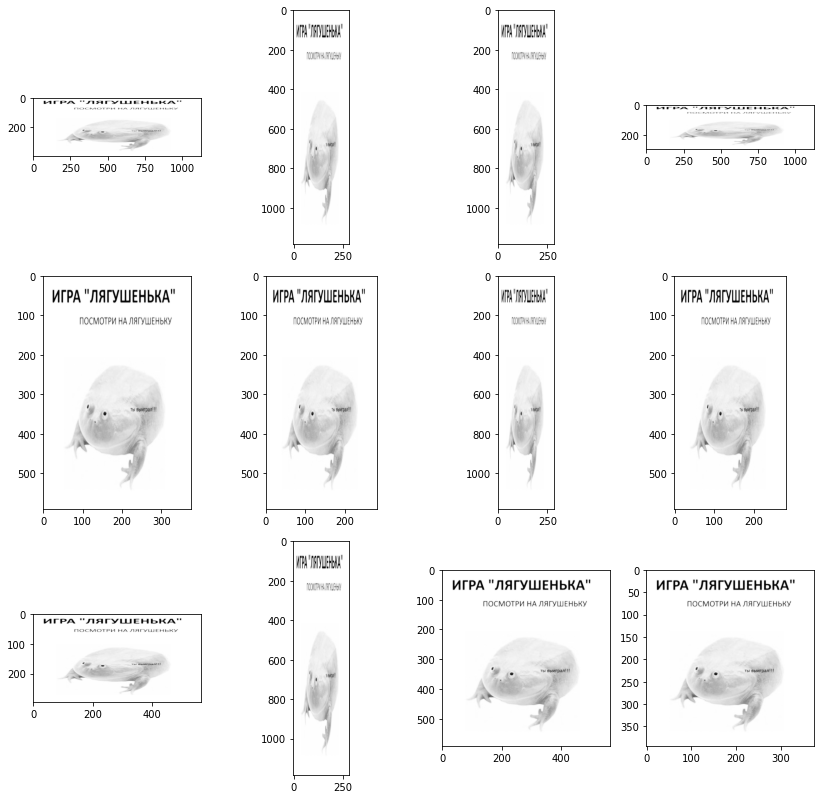

In [22]:
data = [image[::np.random.randint(1, 5), ::np.random.randint(1, 5)] for _ in range(np.random.randint(10, 20))]
plot(data, combine='separate', scale=0.3)

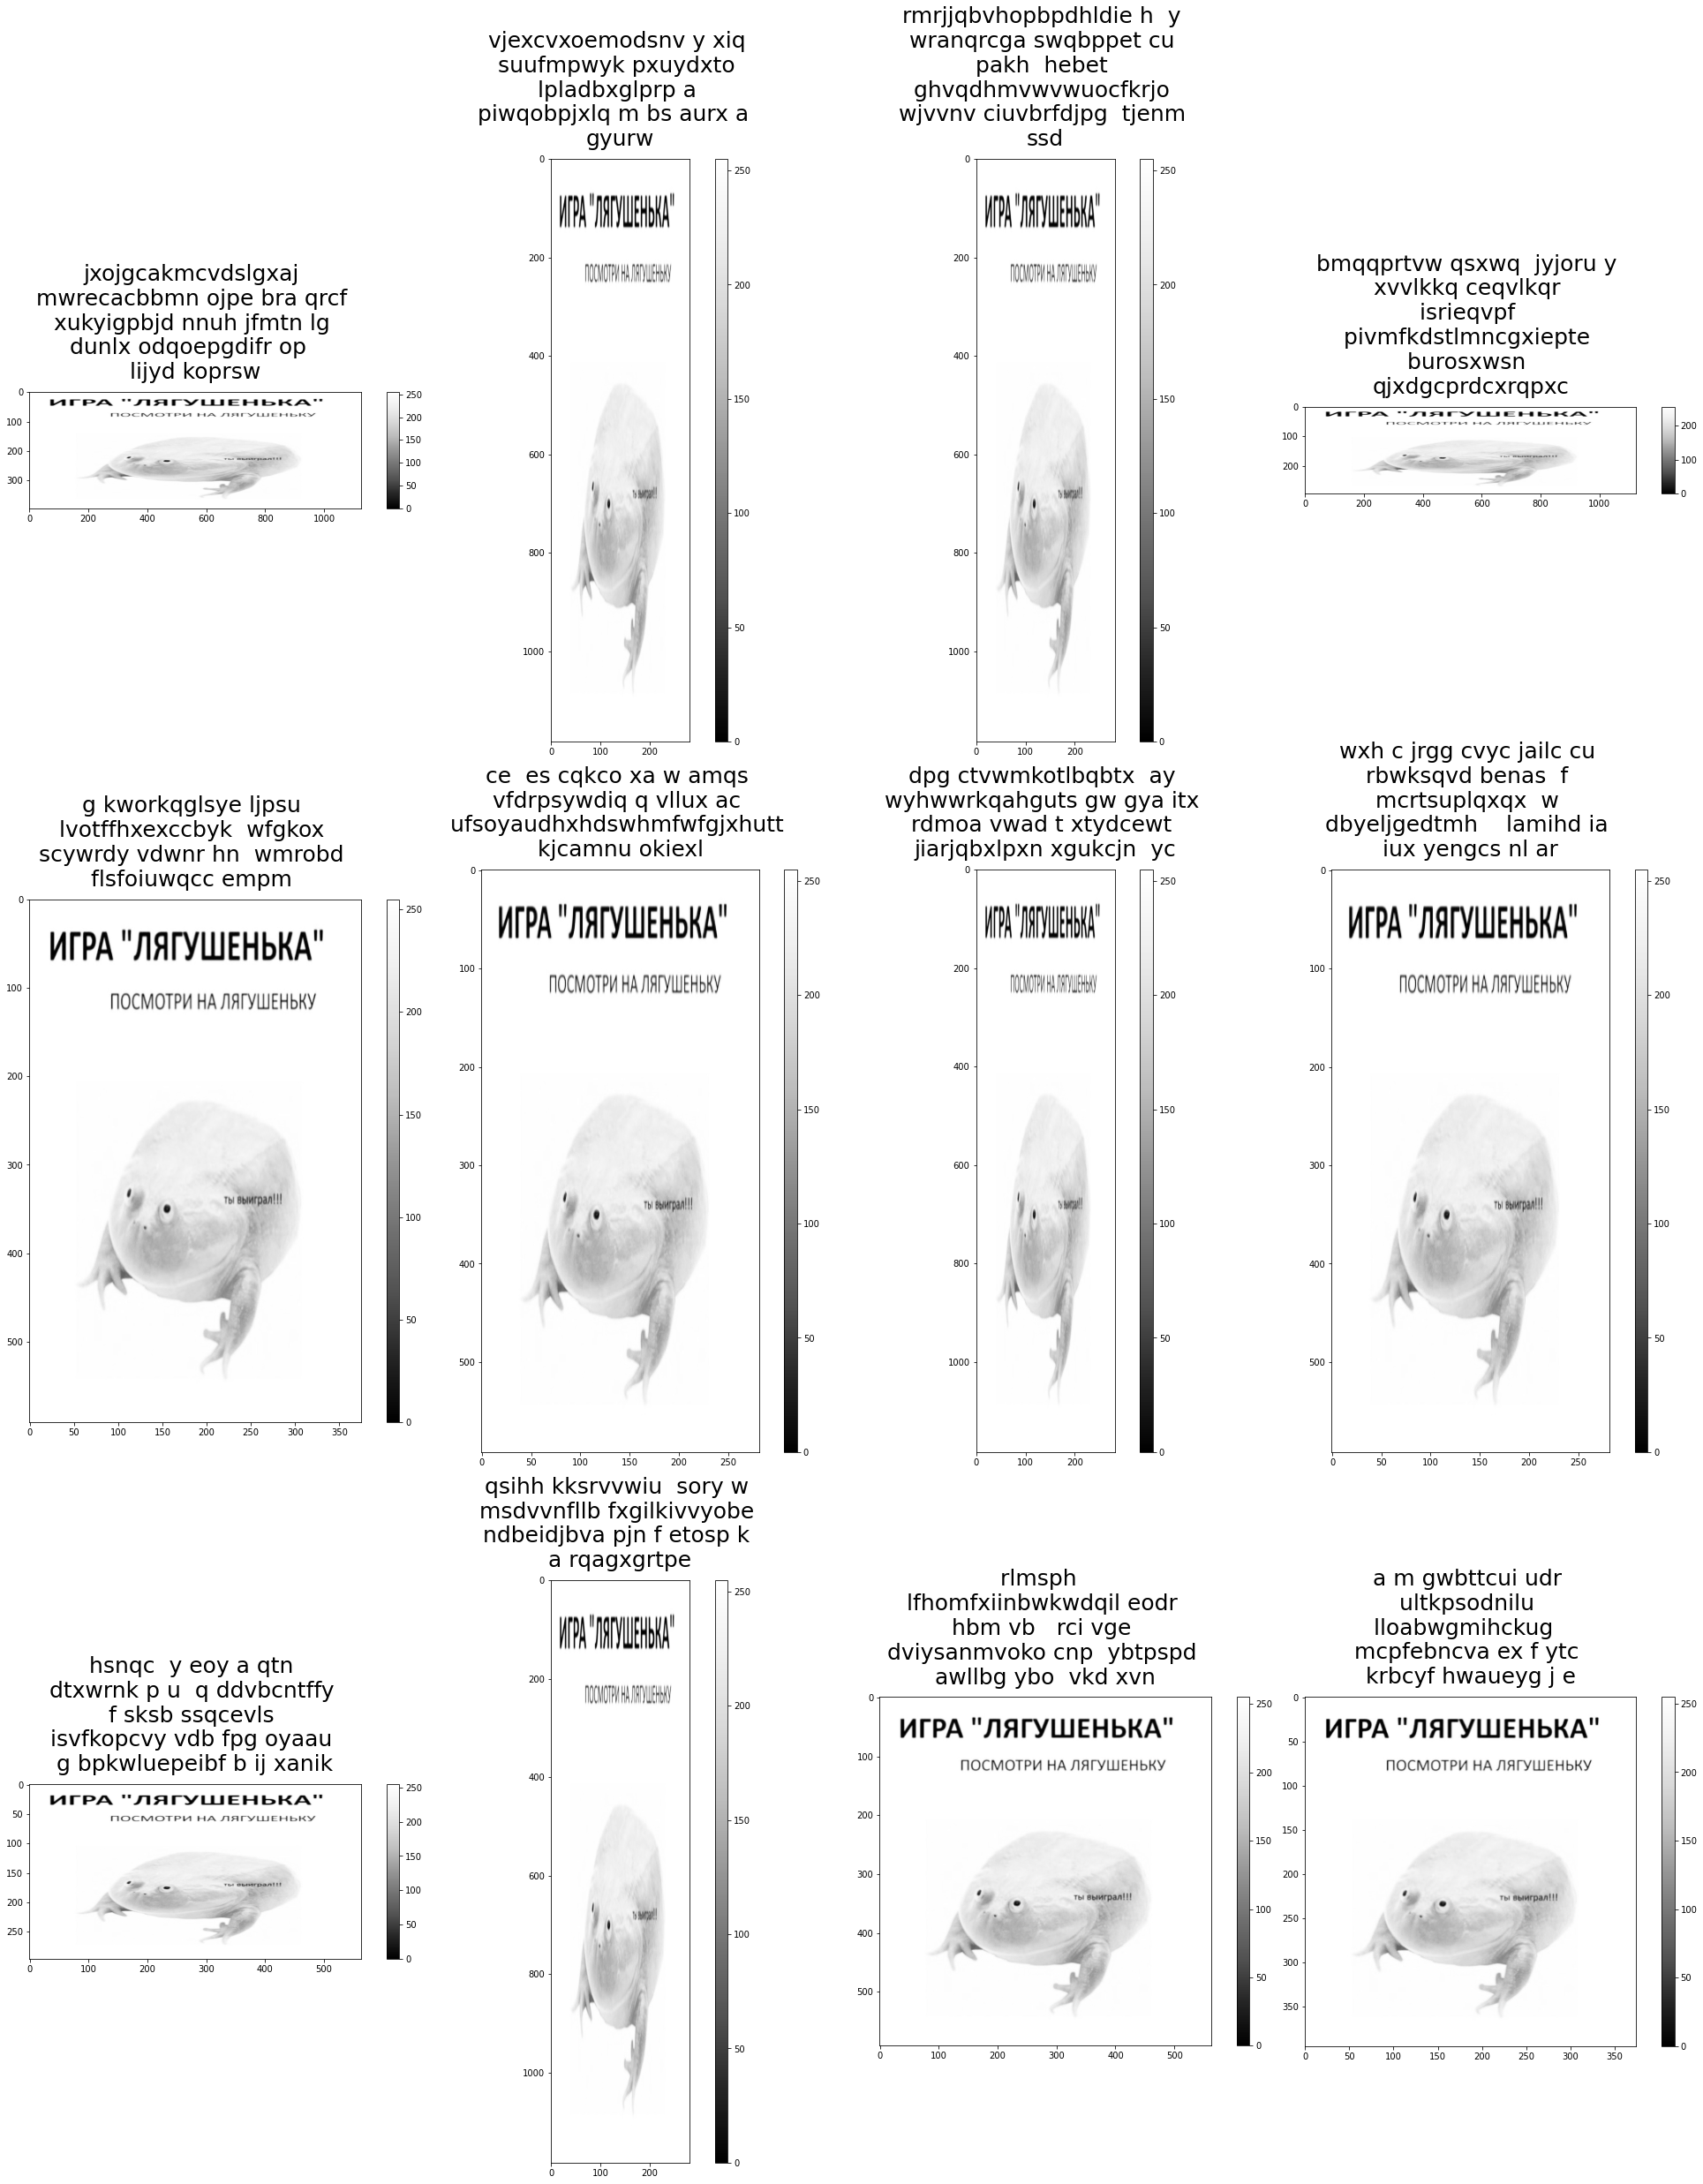

In [23]:
title = [
    ''.join(
        [
            ' ' if x < ord('a') else chr(x)
            for x in np.random.randint(
                low=ord('a') - 5,
                high=ord('z'),
                size=np.random.randint(80, 120)
            )
        ]
    )
    for _ in range(len(data))
]

plot(data, combine='separate', colorbar=True, title=title, title_wrap_width=25)